Este es mi primer ejercicio que hago para practicar :)


In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
%matplotlib inline

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [10]:
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)



# 1. CARGA DATA SET



In [11]:
# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('/Users/black/Data/EJ4/ks-projects-201801.csv')

projects_2017.tail()
#projects_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


# 2. ENTENDAMOS LOS DATOS

In [12]:
# veamos la informacion general del dataframe con info()
print(projects_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [13]:
projects_2017.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

In [14]:
projects_2017.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
projects_2017.isnull().any().any()

True

In [16]:
#cant por main category

main_category = projects_2017['main_category']
main_category.value_counts()


Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [17]:
state_2017 = projects_2017['state']
state_2017.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

## 2.1 estadistica de datos

In [18]:
# frec relativa
normalizado = state_2017.value_counts(normalize=True)
print(normalizado)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64


## 2.2 Distribución de la información

Text(0,0.5,'Frecuencia')

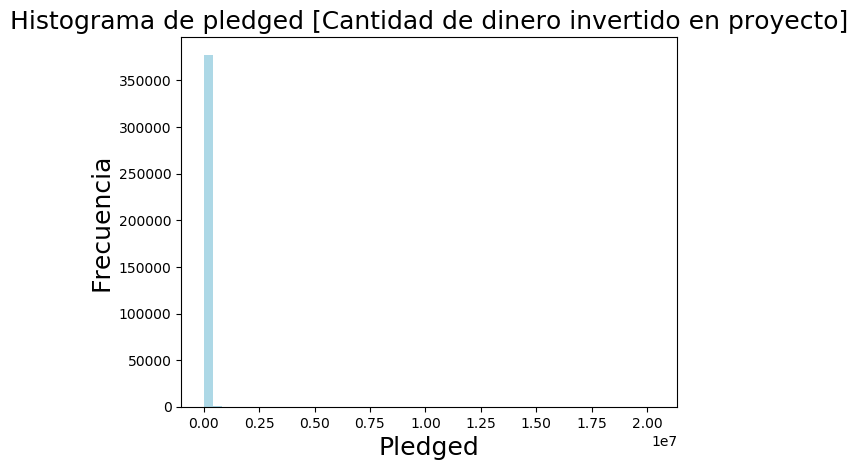

In [19]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
histograma = projects_2017["pledged"].plot.hist(bins=50, color='lightblue')
histograma.set_title("Histograma de pledged [Cantidad de dinero invertido en proyecto]", fontsize=18)
histograma.set_xlabel("Pledged",fontsize=18)
histograma.set_ylabel("Frecuencia", fontsize=18)

In [20]:
# agrego SI/NO columna 
projects_2017['SI/NO']=np.where(projects_2017['usd_goal_real']>=projects_2017['usd_pledged_real'], 'NO', 'YES')
projects_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,SI/NO
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,NO
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,NO
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,NO
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,NO
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,NO


In [21]:
# creamos nuevas columnas en escala logaritmica
projects_2017["pledged_log"] = np.log(projects_2017["pledged"]+1)  #le suma 1 para evitar log(0) Y VALORES NEGATIVOS en valores NULOS
projects_2017["goal_log"] = np.log(projects_2017["goal"]+1)

### HISTOGRAMA : Con escala LOGARITMICA

Text(0,0.5,'Frecuencia')

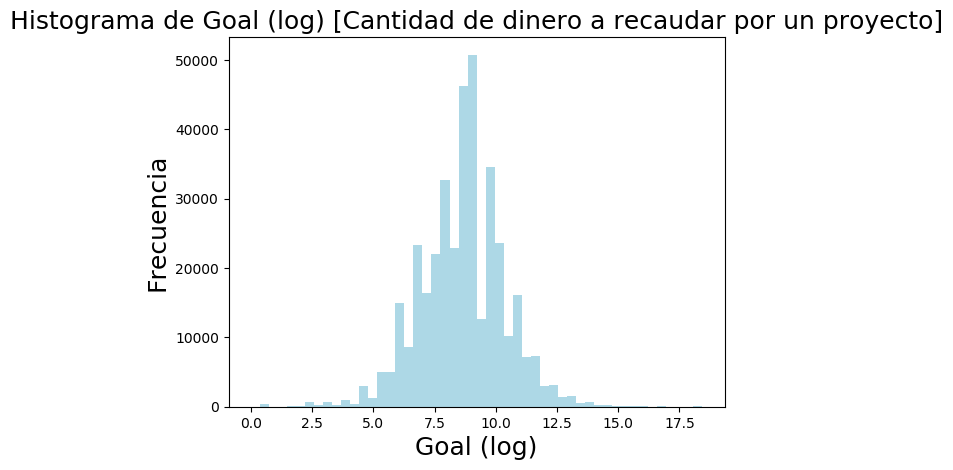

In [22]:
histograma_log = projects_2017["goal_log"].plot.hist(bins=50, color='lightblue')
histograma_log.set_title("Histograma de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
histograma_log.set_xlabel("Goal (log)",fontsize=18)
histograma_log.set_ylabel("Frecuencia", fontsize=18)

## Density Plot


In [23]:
# verifico que haya agregado nuevas columnas: pledge_log , goal_log

# SEABORN uso!   

https://seaborn.pydata.org/generated/seaborn.distplot.html

/Users/black/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

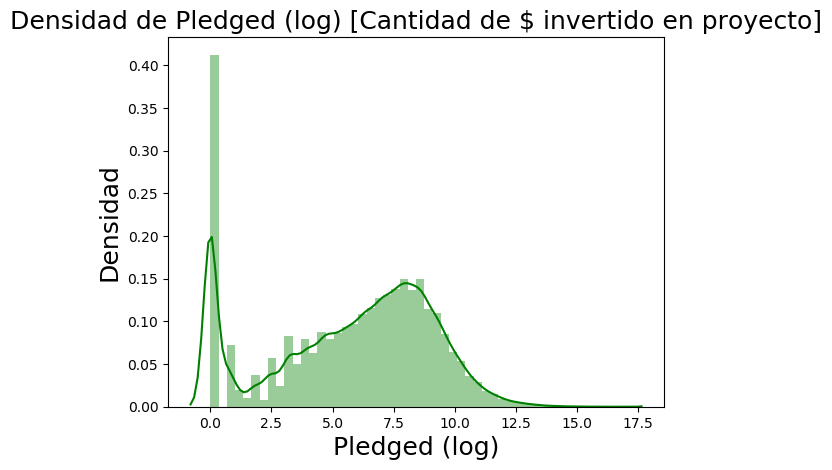

In [24]:

densidadhisto_pledged = sns.distplot(projects_2017["pledged_log"], color='g')
densidadhisto_pledged.set_title("Densidad de Pledged (log) [Cantidad de $ invertido en proyecto]", fontsize=18)
densidadhisto_pledged.set_xlabel("Pledged (log)",fontsize=18)
densidadhisto_pledged.set_ylabel("Densidad", fontsize=18)

/Users/black/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

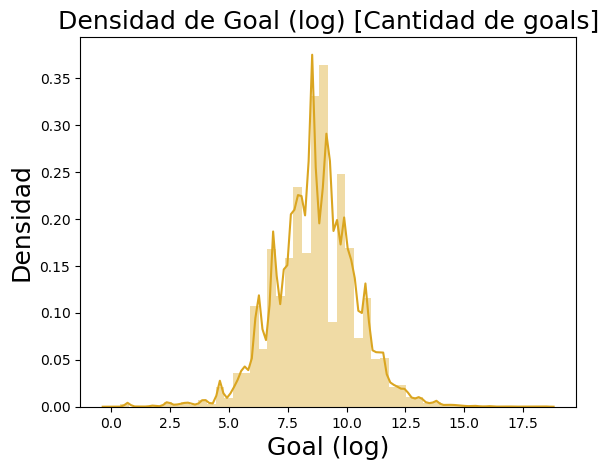

In [25]:
densidadhisto = sns.distplot(projects_2017["goal_log"], color='goldenrod')
densidadhisto.set_title("Densidad de Goal (log) [Cantidad de goals]", fontsize=18)
densidadhisto.set_xlabel("Goal (log)",fontsize=18)
densidadhisto.set_ylabel("Densidad", fontsize=18)

## SUPERPOSICION DE HISTOGRAMA

Text(0,0.5,'Frecuencia')

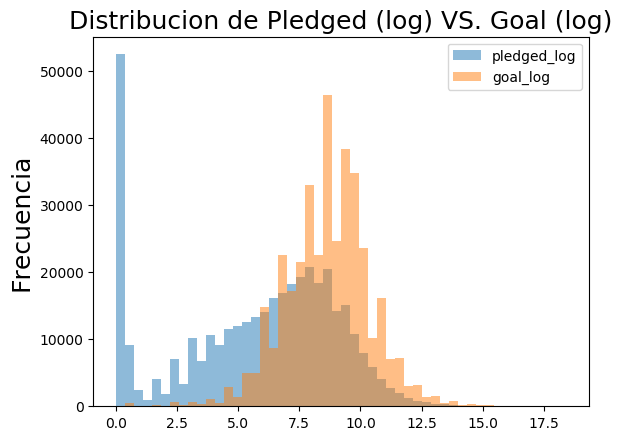

In [26]:
# ambos histogramas juntos !! 
doblehisto = projects_2017[["pledged_log","goal_log"]].plot.hist(bins=50,alpha=0.5 )
doblehisto.set_title("Distribucion de Pledged (log) VS. Goal (log)", fontsize=18)
doblehisto.set_ylabel("Frecuencia", fontsize=18)

/Users/black/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Pledged VS. Goal')

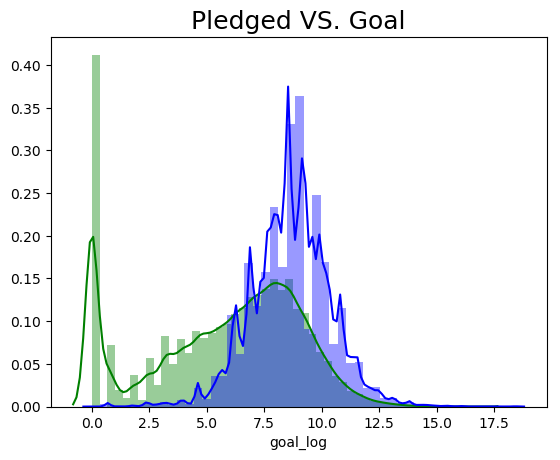

In [27]:
# SUPERPONGO graficos de densidad-----> SEABOARN!
superposicion_densidad = sns.distplot(projects_2017['pledged_log'], color='g', label='pledged (log)')
superposicion_densidad = sns.distplot(projects_2017['goal_log'], color='b', label='goal (log)')
superposicion_densidad.set_title("Pledged VS. Goal", fontsize=18)

# 3. Analizando por Estado del proyecto


Analizar los proyecto segun su estado final (variable categorica): media , varianza, cantidad por categoria.

## EN QUE CATEGORIA HUBO MAS APLICANTES?

In [28]:
cantidadpormaincategory = projects_2017['main_category'].value_counts()
cantidadpormaincategory

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

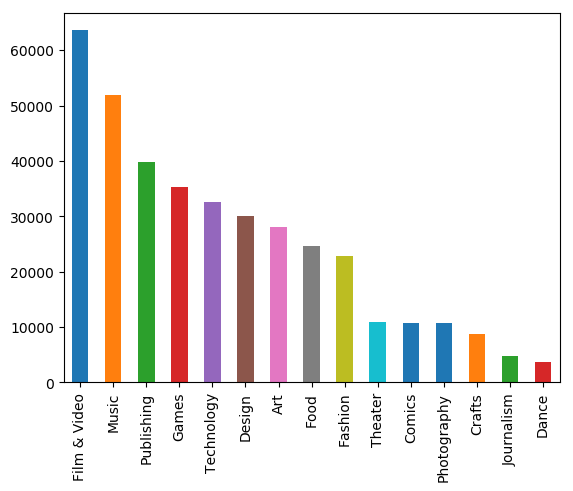

In [29]:
cantidadpormaincategory.plot.bar()

In [30]:
projects_2017.columns.values

array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'SI/NO',
       'pledged_log', 'goal_log'], dtype=object)

Text(0,0.5,'Name of Category')

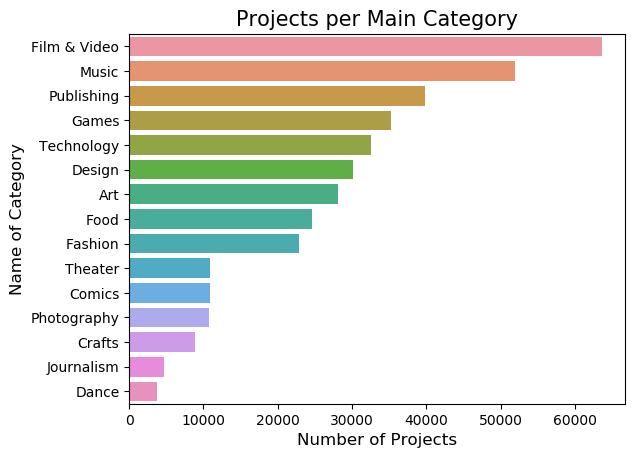

In [31]:
barplot2 = sns.barplot(x=cantidadpormaincategory.values, y=cantidadpormaincategory.index, orient='h')
barplot2.set_title("Projects per Main Category", fontsize=15)
barplot2.set_xlabel("Number of Projects", fontsize=12)
barplot2.set_ylabel("Name of Category", fontsize=12)

Analizo los extremos y media para entender el comportamiento por cantidad.

In [32]:
gb1 = projects_2017.groupby(["state"]).pledged.agg(['count','max','min','mean'])
gb1.head()


,count,max,min,mean
state,,,,
canceled,38779,1076751.05,0.0,2645.752488
failed,197719,1748630.00,0.0,1426.971450
live,2799,1104279.00,0.0,9085.240497
successful,133956,20338986.27,1.0,24099.779097
suspended,1846,4005111.42,0.0,10816.813987


## Boxplot

In [35]:
#Se puede ver como los YES (VER CONDICION ARRIBA), TIENDEN A TENER MAS PLEDGED GOAL MAS ALTO y se comportan mejor como normal!
# paleta de colores : https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette


#### VOY A COMPARAR DOS boxplot: En el primero veo como se comporta cada estado global, en el segundo veo como se comportan los que SI cumplieron el goal vs los que NO lo cumplieron

##### BOXPLOT 1 

Text(0,0.5,'pledged')

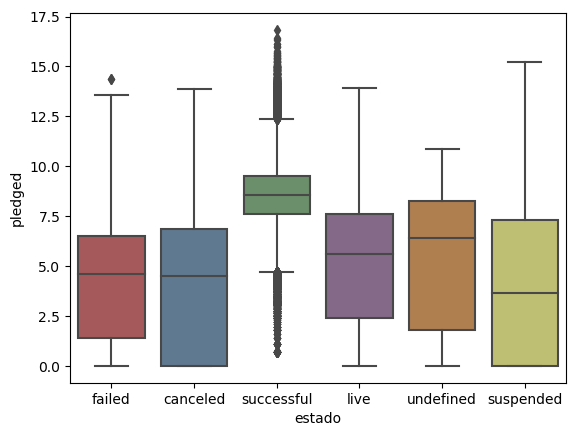

In [36]:
boxplot1 = sns.boxplot(x="state", y="pledged_log", data=projects_2017, palette=sns.color_palette("Set1", n_colors=8, desat=.5))
boxplot1.set_xlabel("estado")
boxplot1.set_ylabel("pledged")

#### BOXPLOT 2 : Vemos como los que si cumplen el goal (YES) tienden a tener una media mayor

Text(0,0.5,'pledged')

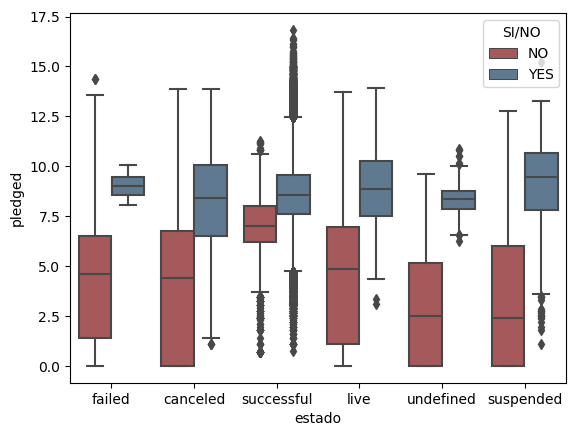

In [37]:
boxplot1 = sns.boxplot(x="state", y="pledged_log", data=projects_2017, palette=sns.color_palette("Set1", n_colors=8, desat=.5), hue="SI/NO")
boxplot1.set_xlabel("estado")
boxplot1.set_ylabel("pledged")

# 4. Categoria mas importantes para los proyectos.¶


In [38]:
#success = projects_2017['state'] == "successful"
success = projects_2017[projects_2017['state'] == "successful"]
failed = projects_2017[projects_2017['state'] == "failed"]


Quiero saber que categoria tuvo mas exito.Pasando a las variables categoricas podriamos querer analizar cuales son las principales categoria que tienen la mayor cantidad de proyectos. 

In [39]:
main_categories_counts = projects_2017["main_category"].value_counts()
main_categories_counts

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

## BAR PLOT

Text(0,0.5,'Nombre de categoria')

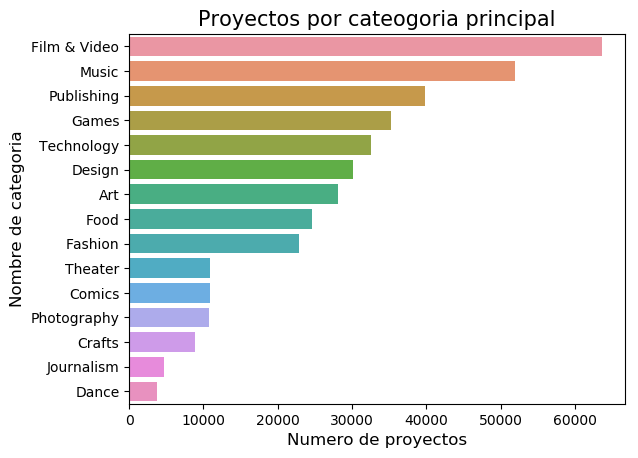

In [40]:
barplotcat = sns.barplot(x=main_categories_counts.values, y=main_categories_counts.index, orient='h')
barplotcat.set_title("Proyectos por cateogoria principal", fontsize=15)
barplotcat.set_xlabel("Numero de proyectos", fontsize=12)
barplotcat.set_ylabel("Nombre de categoria", fontsize=12)

film y video son las categorias con mayo cantidad de proyectos. Quisiera saber que porsentaje de esos proyectos logro el exito.

# 5. Analisis por Categorias Exitosas y Fallidas


## Cantidad fallados por categoria

In [41]:
cant_falladasxcategoria = projects_2017[projects_2017["state"] == "failed"]["category"].value_counts()[:25]
cant_falladasxcategoria

Product Design      10718
Documentary          8599
Food                 7119
Video Games          6942
Music                6201
Fiction              5875
Film & Video         5554
Fashion              5341
Nonfiction           5184
Apps                 4909
Apparel              4752
Shorts               4721
Technology           4409
Art                  4101
Tabletop Games       3878
Web                  3866
Children's Books     3850
Webseries            3450
Publishing           3412
Photography          3370
Crafts               2990
Hip-Hop              2857
Rock                 2746
Narrative Film       2605
Theater              2279
Name: category, dtype: int64

Text(0,0.5,'Nombre de la categoria')

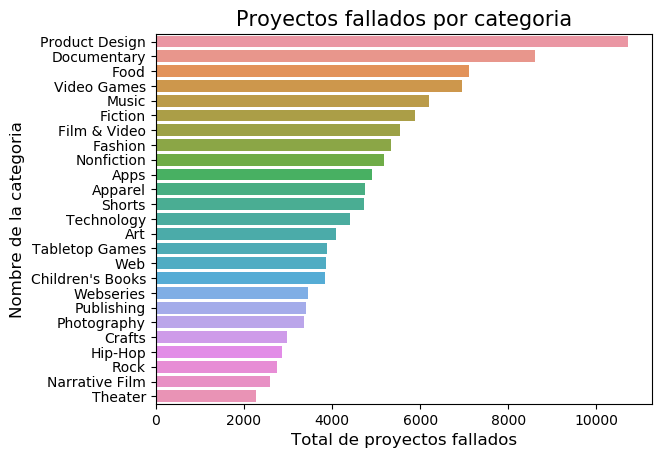

In [42]:
fallados_plot = sns.barplot(x= cant_falladasxcategoria.values, y=cant_falladasxcategoria.index)
fallados_plot.set_title("Proyectos fallados por categoria", fontsize=15)
fallados_plot.set_xlabel("Total de proyectos fallados", fontsize=12)
fallados_plot.set_ylabel("Nombre de la categoria", fontsize=12)

## Cantidad de exitos por categoria

In [43]:
cant_exitosporcategoria = projects_2017[projects_2017["state"] == "successful"]["category"].value_counts() [:25]
cant_exitosporcategoria

Product Design      7962
Tabletop Games      7866
Shorts              6673
Music               6432
Documentary         5924
Theater             4405
Indie Rock          3618
Rock                3500
Art                 3385
Food                3297
Film & Video        3070
Country & Folk      2812
Comics              2506
Video Games         2386
Children's Books    2348
Fiction             2233
Nonfiction          2230
Fashion             2188
Narrative Film      2013
Photography         1876
Webseries           1698
Classical Music     1647
Publishing          1640
Illustration        1626
Comic Books         1614
Name: category, dtype: int64

Text(0,0.5,'Nombre de categoria')

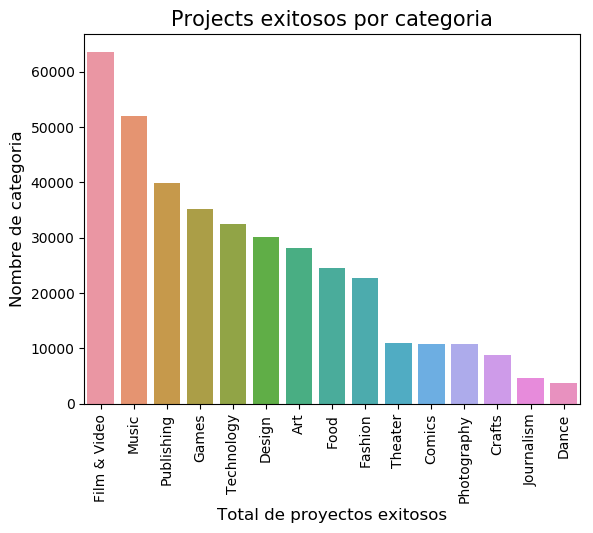

In [44]:
#barplot_exitoxcategoria = sns.barplot(x= cant_exitosporcategoria.values, y=cant_exitosporcategoria.index)
barplot_exitoxcategoria = sns.countplot(x="main_category",order=projects_2017['main_category'].value_counts().index, data=projects_2017, orient='v')
barplot_exitoxcategoria.set_xticklabels(barplot_exitoxcategoria.get_xticklabels(),rotation=90)                                                                             
                                                                              
                                                                              
barplot_exitoxcategoria.set_title("Projects exitosos por categoria", fontsize=15)
barplot_exitoxcategoria.set_xlabel("Total de proyectos exitosos", fontsize=12)
barplot_exitoxcategoria.set_ylabel("Nombre de categoria", fontsize=12)                                                                         
                                                                         
                                                                         

# 6. RELACION ENTRE DOS VARIABLES: Regresion lineal

In [45]:
#repaso columnas de mi df
projects_2017.columns.values



array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'SI/NO',
       'pledged_log', 'goal_log'], dtype=object)

In [46]:
#Correlacion entre dos variables x1, x2 cualqueira
projects_2017.corr()                                                                            




,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_log,goal_log
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854,-0.001273,-0.000562
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692,-0.021713,0.142075
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024,0.182126,0.109675
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517,0.185374,0.087158
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172,0.154523,0.090739
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596,0.175659,0.099657
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000,-0.022331,0.133077
pledged_log,-0.001273,-0.021713,0.182126,0.185374,0.154523,0.175659,-0.022331,1.000000,0.142996
goal_log,-0.000562,0.142075,0.109675,0.087158,0.090739,0.099657,0.133077,0.142996,1.000000


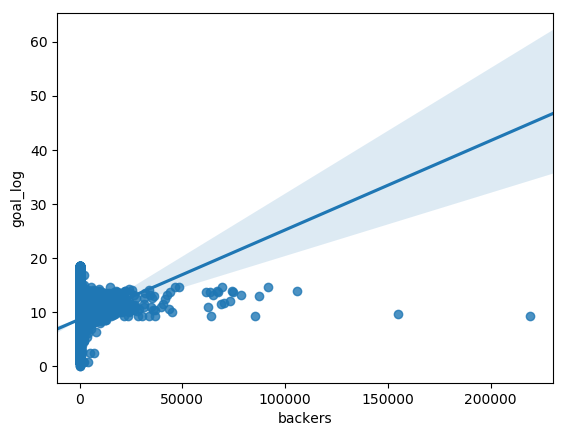

In [54]:
# Estudio la relacion lineal entre backers y goal_log. 
sns.regplot(x="backers", y="goal_log", data=projects_2017)


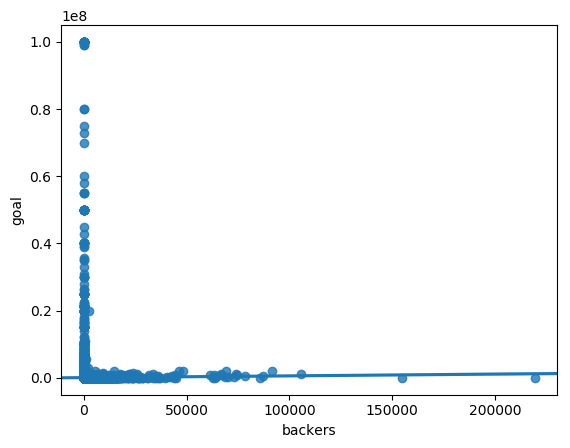

In [48]:
sns.regplot(x="backers", y="goal", data=projects_2017)


No me sierve de nada! 


# CONCLUSIONES DE MI PRIMERA PRACTICA

1) Pude entender la syntaxis del lenguaje.
2) Me falta profundizar en plots.
3) es importante conocer BIEN los datasets antes de empezar a escribir.
4) Hay varias librerias para los plots :matplotlib, seaborn,etc
5) trabajar en la prolijidad del trabajo.
6) te salieron varios plots y lograste entender el significado sobre los datasets.

proximos desafios : 
1) hacer 2 ejercicios mas
2) practicar plotting 
3) narrar mas lo que hago